In [22]:
import pandas as pd
#import os
from sklearn.utils import resample
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding, SpectralEmbedding, Isomap
from sklearn.cluster import SpectralClustering
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score
import time

In [23]:
data_train=pd.read_csv("./mnist_train.csv")
data_test=pd.read_csv("./mnist_test.csv")
# path : data_test=pd.read_csv("C:\\Users\\Evangelia\\Desktop\\SVM MNIST\\mnist_test.csv")

In [24]:
undersampling_train_data=resample(data_train,replace=False,n_samples=2500,random_state=42)
undersampling_test_data=resample(data_test,replace=False,n_samples=2500,random_state=42)


In [25]:
#diaxwrizw ta data 
X_train=undersampling_train_data[undersampling_train_data.columns[1:]] 
y_train=undersampling_train_data['label']
X_test=undersampling_test_data[undersampling_test_data.columns[1:]]
y_test=undersampling_test_data['label']

In [26]:
# normalize data in the range [-1,1]
scaler = MinMaxScaler(feature_range=(-1,1))
# fit only th training data in order to find the margin and then test to data without normalize them
scaler.fit(X_train)
features_scalar = scaler.transform(X_train)
features_validation_scalar = scaler.transform(X_test)

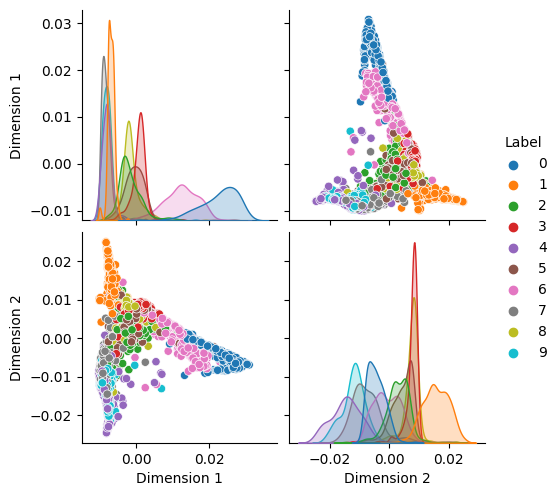

In [27]:
#spectral embedding
SE=SpectralEmbedding(n_components=2, n_neighbors=5)
features_embedded = SE.fit_transform(features_scalar)
embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label':y_train})
sns.color_palette("tab10")
sns.pairplot(embedded_labels, hue='Label', palette="tab10")
plt.show()

c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


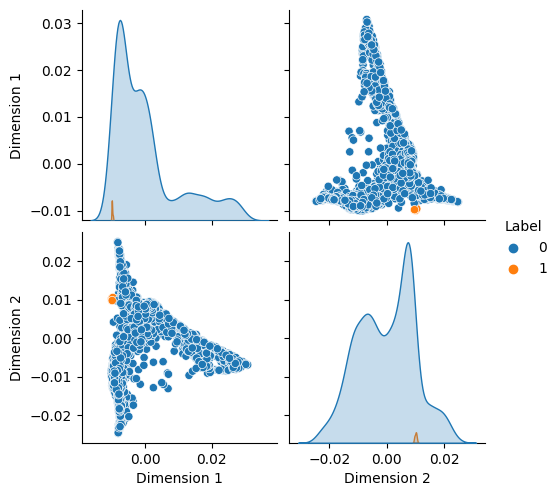

Clustering accuracy (homogeneity score):  0.23202408259610818

Clustering accuracy (silhouette score):  -0.039745727099652114

training time: 0.0010013580322265625 s



Classification accuracy:  9.879999999999999 




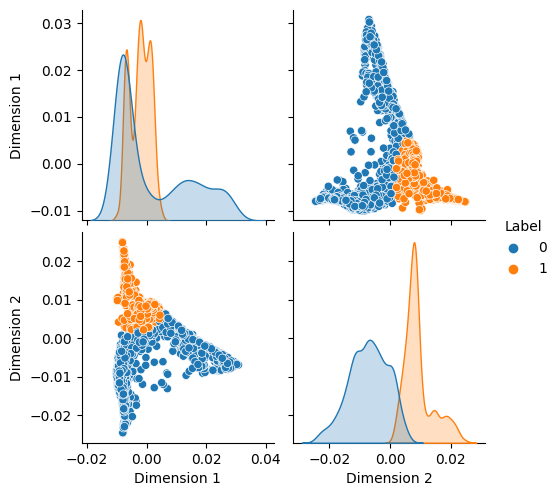

Clustering accuracy (homogeneity score):  19.566264240956524

Clustering accuracy (silhouette score):  0.39123264135345037

training time: 0.0010004043579101562 s



Classification accuracy:  9.8 




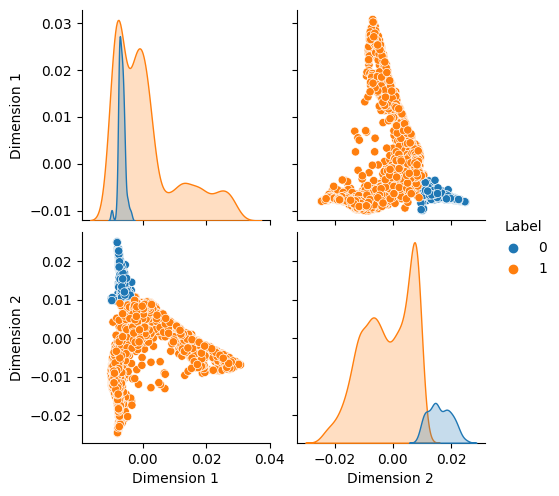

Clustering accuracy (homogeneity score):  11.750097020762103

Clustering accuracy (silhouette score):  0.24352553686202427

training time: 0.0010001659393310547 s



Classification accuracy:  11.4 




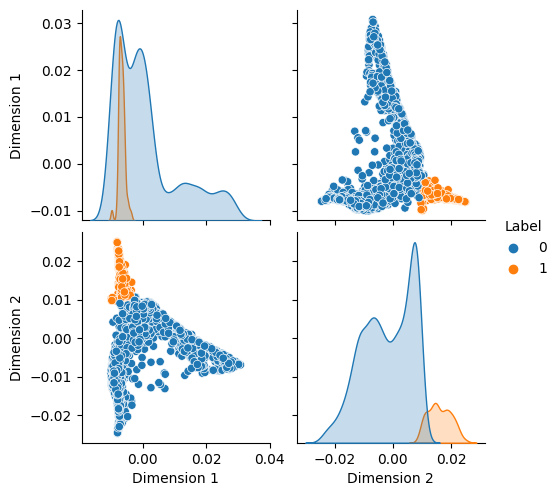

Clustering accuracy (homogeneity score):  11.750097020762105

Clustering accuracy (silhouette score):  0.24352553686202427

training time: 0.0 s



Classification accuracy:  9.879999999999999 




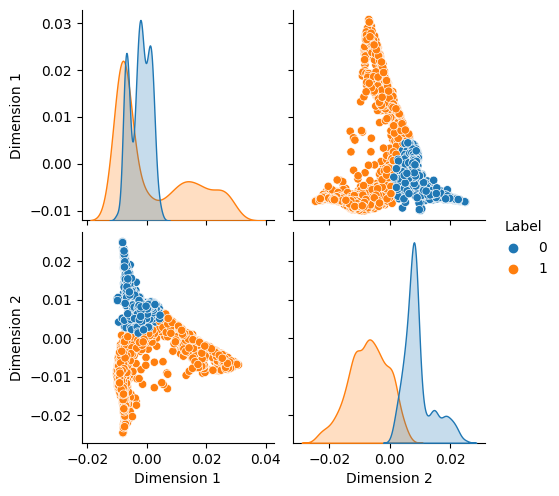

Clustering accuracy (homogeneity score):  19.756791077930387

Clustering accuracy (silhouette score):  0.39454944419051446

training time: 0.0010006427764892578 s



Classification accuracy:  11.48 




In [28]:
#Spectral Clustering

for i in range(5,30,5):
    spectralClustering = SpectralClustering(n_clusters=2, affinity= 'nearest_neighbors', n_neighbors=i)
    spectralClustering.fit(features_embedded)
    predicted_labels = spectralClustering.labels_
    embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label': predicted_labels})
    sns.pairplot(embedded_labels, hue='Label',palette="tab10")
    plt.show()

    #More accurate implementation, considering opposite labels
    accuracy = homogeneity_score(y_train, predicted_labels)
    print ('Clustering accuracy (homogeneity score): ',accuracy*100)

    silhouette = silhouette_score(features_embedded, predicted_labels)
    print('Clustering accuracy (silhouette score): ',silhouette)
   
    SE=SpectralEmbedding(n_components=2, n_neighbors=5)
    #transform data
    features_test_embedded = SE.fit_transform(features_validation_scalar)
    
    clf = NearestCentroid()
    start_time=time.time()
    clf.fit(features_embedded, predicted_labels)
    end_time=time.time()
    print(f"training time: {end_time - start_time} s\n")
    predicted_labels = clf.predict(features_test_embedded)
    accuracy = accuracy_score(y_test, predicted_labels)		
    print ('Classification accuracy: ',accuracy*100, '\n')

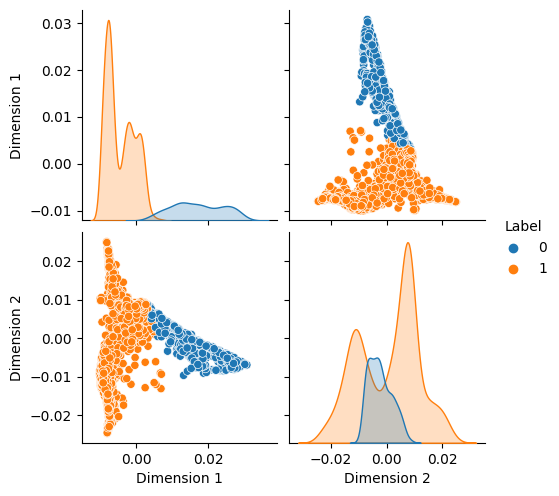

Clustering accuracy (homogeneity score):  18.18845487352782

Clustering accuracy (silhouette score):  0.46824109800085945

training time: 0.0 s



Classification accuracy:  21.16 




In [29]:
spectralClustering = SpectralClustering(n_clusters=2, affinity= 'rbf')
spectralClustering.fit(features_embedded)
predicted_labels = spectralClustering.labels_
embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label': predicted_labels})
sns.pairplot(embedded_labels, hue='Label',palette="tab10")
plt.show()

#More accurate implementation, considering opposite labels
accuracy = homogeneity_score(y_train, predicted_labels)
print ('Clustering accuracy (homogeneity score): ',accuracy*100)

silhouette = silhouette_score(features_embedded, predicted_labels)
print('Clustering accuracy (silhouette score): ',silhouette)
#clasify test_data 
SE=SpectralEmbedding(n_components=2, n_neighbors=5)
#transform data
features_test_embedded = SE.fit_transform(features_validation_scalar)
    
clf = NearestCentroid()
start_time=time.time()
clf.fit(features_embedded, predicted_labels)
end_time=time.time()
print(f"training time: {end_time - start_time} s\n")
predicted_labels = clf.predict(features_test_embedded)
accuracy = accuracy_score(y_test, predicted_labels)		
print ('Classification accuracy: ',accuracy*100, '\n')

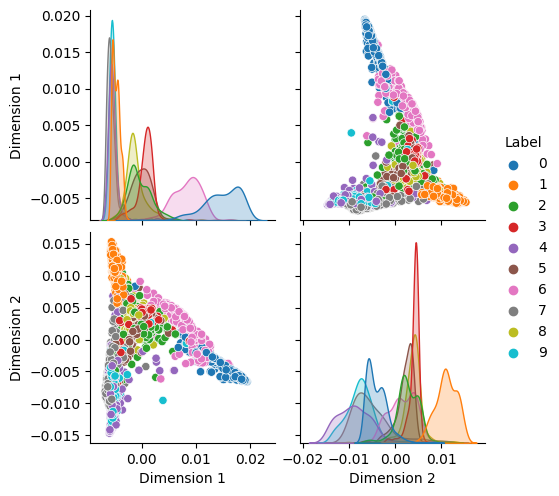

In [30]:
#spectral embedding
SE=SpectralEmbedding(n_components=2, n_neighbors=10)
features_embedded = SE.fit_transform(features_scalar)
embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label':y_train})
sns.color_palette("tab10")
sns.pairplot(embedded_labels, hue='Label', palette="tab10")
plt.show()

c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


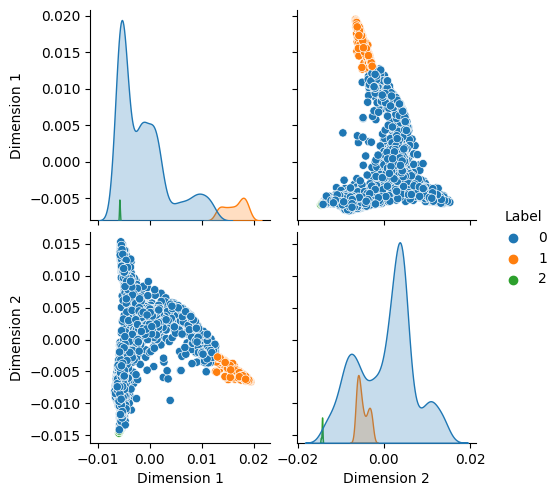

Clustering accuracy (homogeneity score):  9.085160727428672

Clustering accuracy (silhouette score):  0.2162827234839328

training time: 0.0010008811950683594 s



Classification accuracy:  3.4000000000000004 




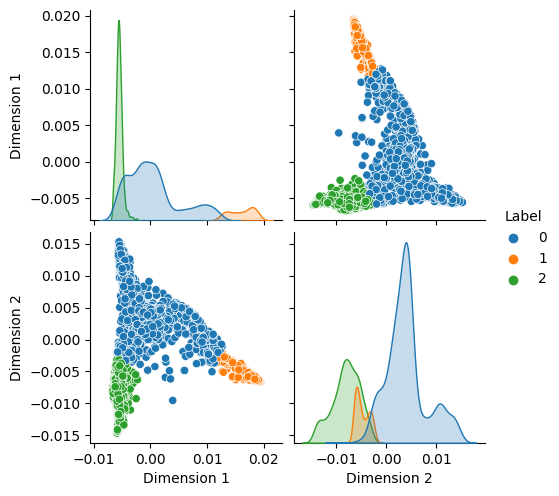

Clustering accuracy (homogeneity score):  28.519025164395096

Clustering accuracy (silhouette score):  0.5325817260697914

training time: 0.0010004043579101562 s



Classification accuracy:  9.16 




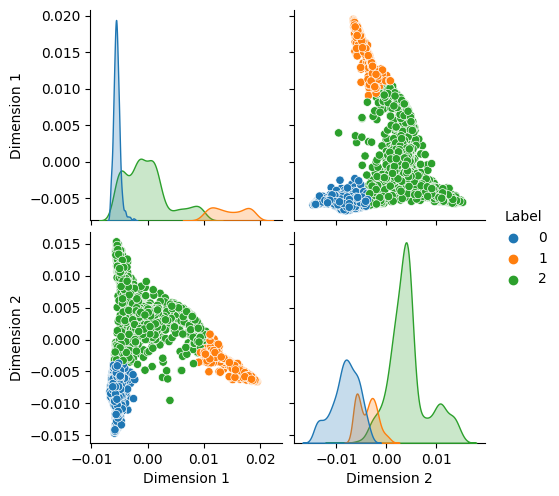

Clustering accuracy (homogeneity score):  29.660169417626275

Clustering accuracy (silhouette score):  0.5733325081870877

training time: 0.0009996891021728516 s



Classification accuracy:  1.5599999999999998 




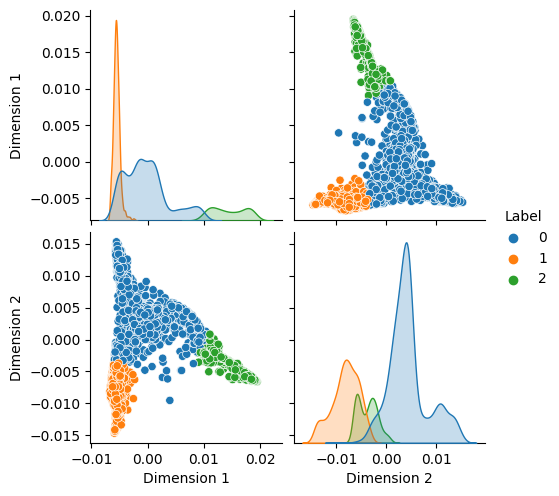

Clustering accuracy (homogeneity score):  29.73870509192058

Clustering accuracy (silhouette score):  0.5752843077117265

training time: 0.0 s



Classification accuracy:  12.0 




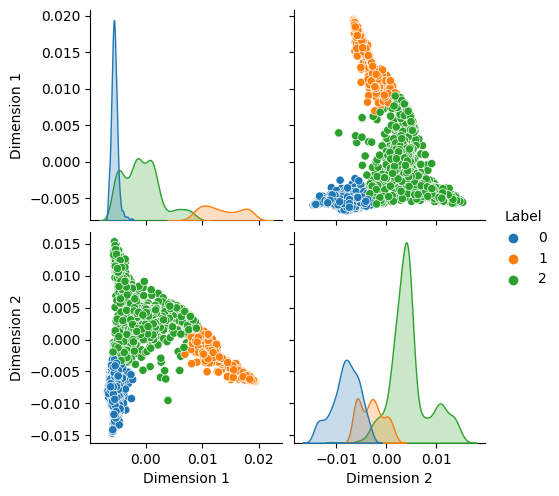

Clustering accuracy (homogeneity score):  31.61131152343937

Clustering accuracy (silhouette score):  0.6010342752061578

training time: 0.0009982585906982422 s



Classification accuracy:  1.44 




In [31]:
#Spectral Clustering

for i in range(5,30,5):
    spectralClustering = SpectralClustering(n_clusters=3, affinity= 'nearest_neighbors', n_neighbors=i)
    spectralClustering.fit(features_embedded)
    predicted_labels = spectralClustering.labels_
    embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label': predicted_labels})
    sns.pairplot(embedded_labels, hue='Label',palette="tab10")
    plt.show()

    #More accurate implementation, considering opposite labels
    accuracy = homogeneity_score(y_train, predicted_labels)
    print ('Clustering accuracy (homogeneity score): ',accuracy*100)

    silhouette = silhouette_score(features_embedded, predicted_labels)
    print('Clustering accuracy (silhouette score): ',silhouette)
   
    SE=SpectralEmbedding(n_components=2, n_neighbors=10)
    #transform data
    features_test_embedded = SE.fit_transform(features_validation_scalar)
    
    clf = NearestCentroid()
    start_time=time.time()
    clf.fit(features_embedded, predicted_labels)
    end_time=time.time()
    print(f"training time: {end_time - start_time} s\n")
    predicted_labels = clf.predict(features_test_embedded)
    accuracy = accuracy_score(y_test, predicted_labels)		
    print ('Classification accuracy: ',accuracy*100, '\n')

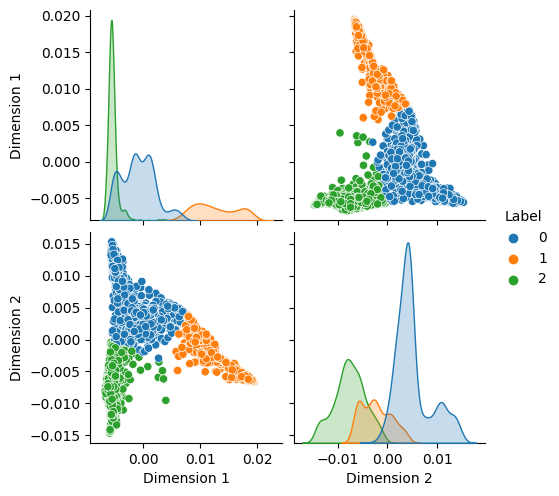

Clustering accuracy (homogeneity score):  33.939024487519205

Clustering accuracy (silhouette score):  0.6227113607912673

training time: 0.0 s



Classification accuracy:  9.28 




In [32]:
spectralClustering = SpectralClustering(n_clusters=3, affinity= 'rbf')
spectralClustering.fit(features_embedded)
predicted_labels = spectralClustering.labels_
embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label': predicted_labels})
sns.pairplot(embedded_labels, hue='Label',palette="tab10")
plt.show()

#More accurate implementation, considering opposite labels
accuracy = homogeneity_score(y_train, predicted_labels)
print ('Clustering accuracy (homogeneity score): ',accuracy*100)

silhouette = silhouette_score(features_embedded, predicted_labels)
print('Clustering accuracy (silhouette score): ',silhouette)
#clasify test_data 
SE=SpectralEmbedding(n_components=2, n_neighbors=10)
#transform data
features_test_embedded = SE.fit_transform(features_validation_scalar)
    
clf = NearestCentroid()
start_time=time.time()
clf.fit(features_embedded, predicted_labels)
end_time=time.time()
print(f"training time: {end_time - start_time} s\n")
predicted_labels = clf.predict(features_test_embedded)
accuracy = accuracy_score(y_test, predicted_labels)		
print ('Classification accuracy: ',accuracy*100, '\n')

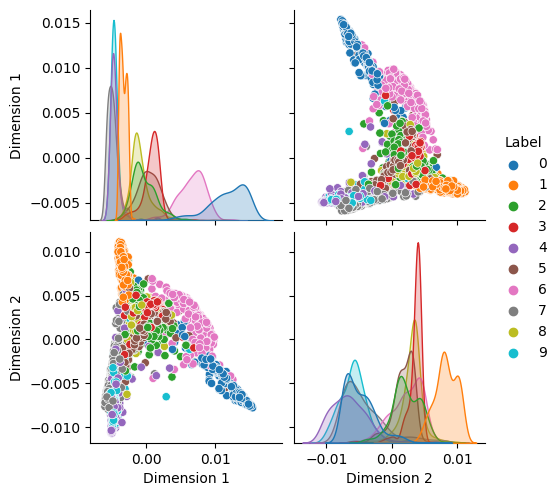

In [33]:
#spectral embedding
SE=SpectralEmbedding(n_components=2, n_neighbors=15)
features_embedded = SE.fit_transform(features_scalar)
embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label':y_train})
sns.color_palette("tab10")
sns.pairplot(embedded_labels, hue='Label', palette="tab10")
plt.show()

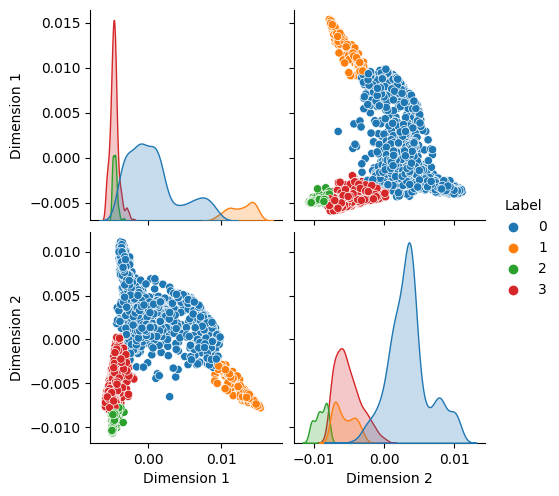

Clustering accuracy (homogeneity score):  31.342334802446913

Clustering accuracy (silhouette score):  0.4579288439818202

training time: 0.0010001659393310547 s



Classification accuracy:  11.200000000000001 




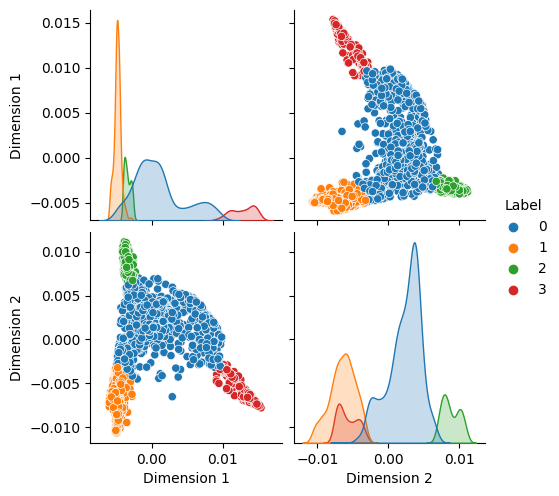

Clustering accuracy (homogeneity score):  35.285310979099265

Clustering accuracy (silhouette score):  0.48171771927399715

training time: 0.00099945068359375 s



Classification accuracy:  12.16 




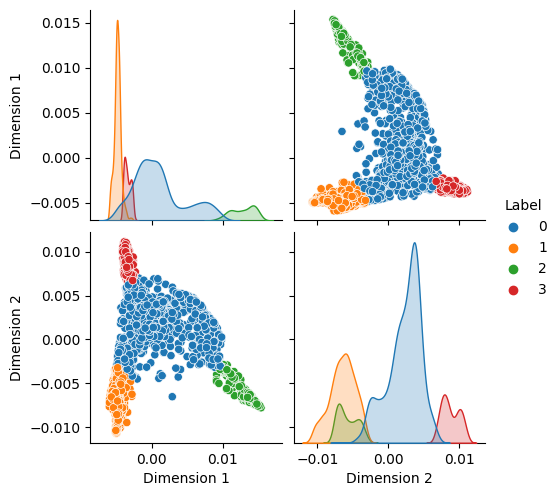

Clustering accuracy (homogeneity score):  35.344663183563554

Clustering accuracy (silhouette score):  0.48157350015237826

training time: 0.0010004043579101562 s



Classification accuracy:  12.32 




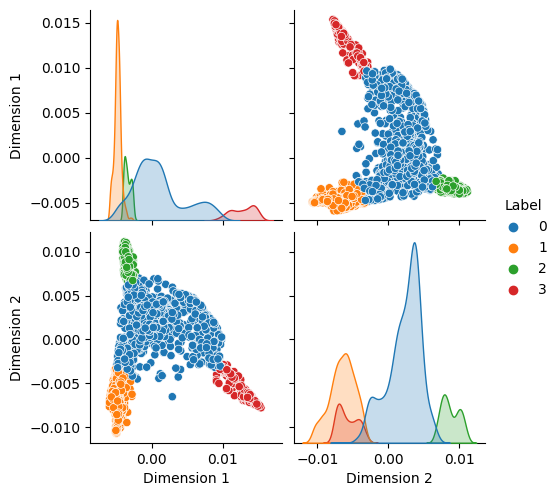

Clustering accuracy (homogeneity score):  35.22157061913927

Clustering accuracy (silhouette score):  0.4793449790961999

training time: 0.0010001659393310547 s



Classification accuracy:  12.16 




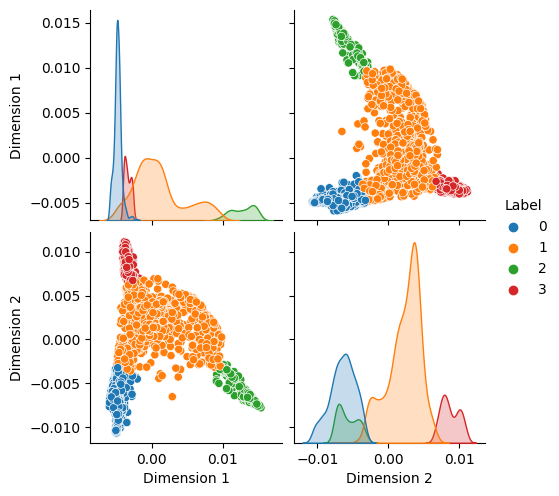

Clustering accuracy (homogeneity score):  35.718811627507954

Clustering accuracy (silhouette score):  0.4846628995846584

training time: 0.0009996891021728516 s



Classification accuracy:  0.24 




In [34]:
#Spectral Clustering

for i in range(5,30,5):
    spectralClustering = SpectralClustering(n_clusters=4, affinity= 'nearest_neighbors', n_neighbors=i)
    spectralClustering.fit(features_embedded)
    predicted_labels = spectralClustering.labels_
    embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label': predicted_labels})
    sns.pairplot(embedded_labels, hue='Label',palette="tab10")
    plt.show()

    #More accurate implementation, considering opposite labels
    accuracy = homogeneity_score(y_train, predicted_labels)
    print ('Clustering accuracy (homogeneity score): ',accuracy*100)

    silhouette = silhouette_score(features_embedded, predicted_labels)
    print('Clustering accuracy (silhouette score): ',silhouette)
   
    SE=SpectralEmbedding(n_components=2, n_neighbors=15)
    #transform data
    features_test_embedded = SE.fit_transform(features_validation_scalar)
    
    clf = NearestCentroid()
    start_time=time.time()
    clf.fit(features_embedded, predicted_labels)
    end_time=time.time()
    print(f"training time: {end_time - start_time} s\n")
    predicted_labels = clf.predict(features_test_embedded)
    accuracy = accuracy_score(y_test, predicted_labels)		
    print ('Classification accuracy: ',accuracy*100, '\n')

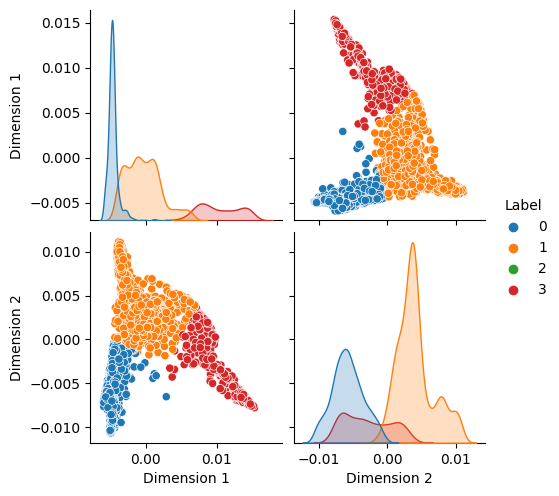

Clustering accuracy (homogeneity score):  32.264658225012774

Clustering accuracy (silhouette score):  0.2563062826469057

training time: 0.0010001659393310547 s



Classification accuracy:  3.7600000000000002 




In [35]:
spectralClustering = SpectralClustering(n_clusters=4, affinity= 'rbf')
spectralClustering.fit(features_embedded)
predicted_labels = spectralClustering.labels_
embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label': predicted_labels})
sns.pairplot(embedded_labels, hue='Label',palette="tab10")
plt.show()

#More accurate implementation, considering opposite labels
accuracy = homogeneity_score(y_train, predicted_labels)
print ('Clustering accuracy (homogeneity score): ',accuracy*100)

silhouette = silhouette_score(features_embedded, predicted_labels)
print('Clustering accuracy (silhouette score): ',silhouette)
#clasify test_data 
SE=SpectralEmbedding(n_components=2, n_neighbors=15)
#transform data
features_test_embedded = SE.fit_transform(features_validation_scalar)
    
clf = NearestCentroid()
start_time=time.time()
clf.fit(features_embedded, predicted_labels)
end_time=time.time()
print(f"training time: {end_time - start_time} s\n")
predicted_labels = clf.predict(features_test_embedded)
accuracy = accuracy_score(y_test, predicted_labels)		
print ('Classification accuracy: ',accuracy*100, '\n')

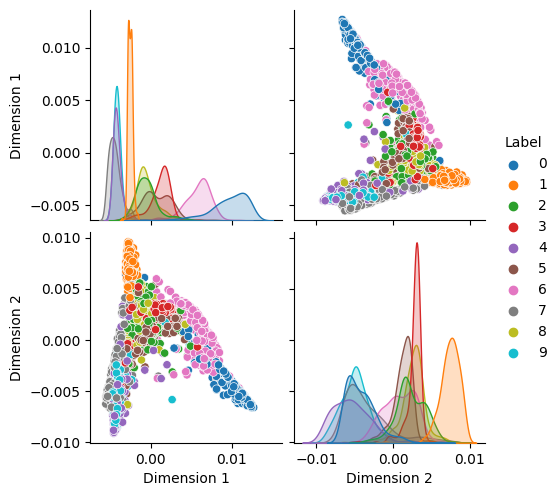

In [36]:
#spectral embedding
SE=SpectralEmbedding(n_components=2, n_neighbors=20)
features_embedded = SE.fit_transform(features_scalar)
embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label':y_train})
sns.color_palette("tab10")
sns.pairplot(embedded_labels, hue='Label', palette="tab10")
plt.show()

c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


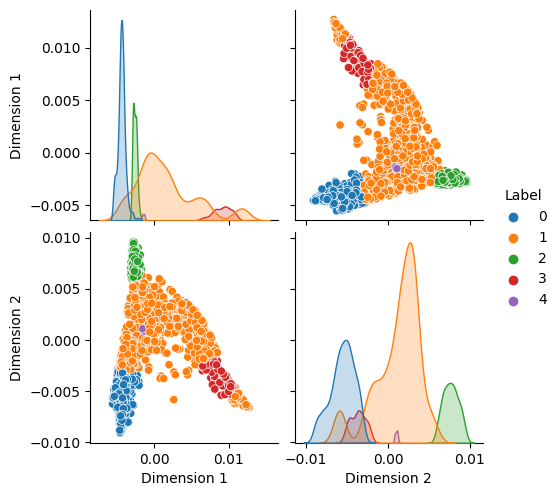

Clustering accuracy (homogeneity score):  31.203622360687355

Clustering accuracy (silhouette score):  0.08378433624091369

training time: 0.0010001659393310547 s



Classification accuracy:  3.64 




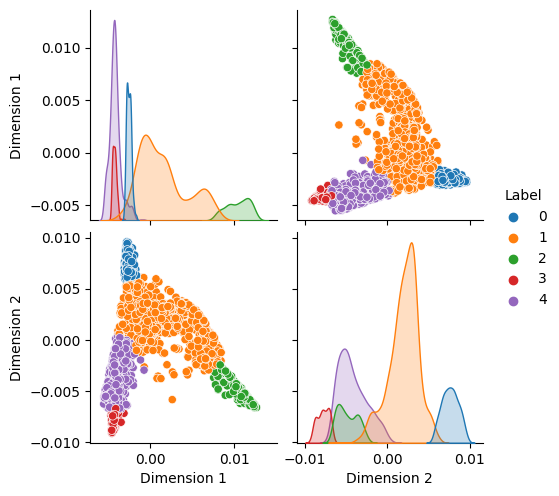

Clustering accuracy (homogeneity score):  40.07219330590271

Clustering accuracy (silhouette score):  0.4182158239480898

training time: 0.0 s



Classification accuracy:  4.36 




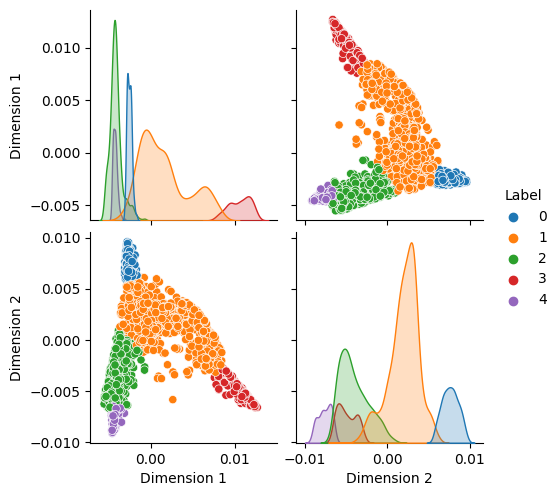

Clustering accuracy (homogeneity score):  39.79794927249007

Clustering accuracy (silhouette score):  0.41144817625946223

training time: 0.0009999275207519531 s



Classification accuracy:  6.68 




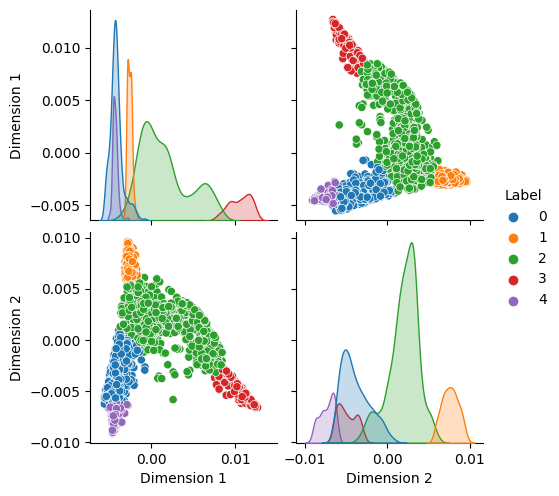

Clustering accuracy (homogeneity score):  39.446405835528225

Clustering accuracy (silhouette score):  0.41246497350372757

training time: 0.0 s



Classification accuracy:  24.52 




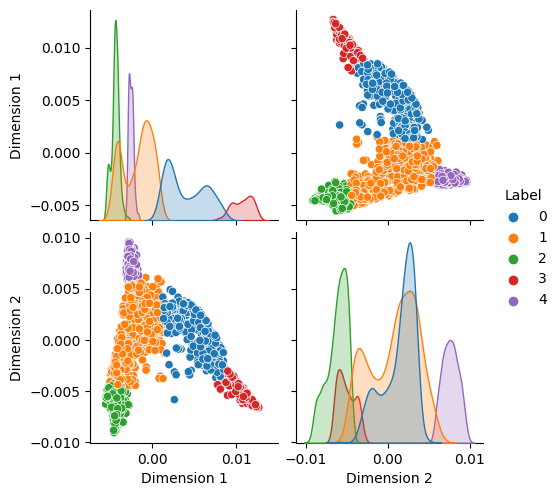

Clustering accuracy (homogeneity score):  38.79672386488904

Clustering accuracy (silhouette score):  0.38708742389999934

training time: 0.0009999275207519531 s



Classification accuracy:  1.4000000000000001 




In [37]:
#Spectral Clustering

for i in range(5,30,5):
    spectralClustering = SpectralClustering(n_clusters=5, affinity= 'nearest_neighbors', n_neighbors=i)
    spectralClustering.fit(features_embedded)
    predicted_labels = spectralClustering.labels_
    embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label': predicted_labels})
    sns.pairplot(embedded_labels, hue='Label',palette="tab10")
    plt.show()

    #More accurate implementation, considering opposite labels
    accuracy = homogeneity_score(y_train, predicted_labels)
    print ('Clustering accuracy (homogeneity score): ',accuracy*100)

    silhouette = silhouette_score(features_embedded, predicted_labels)
    print('Clustering accuracy (silhouette score): ',silhouette)
   
    SE=SpectralEmbedding(n_components=2, n_neighbors=20)
    #transform data
    features_test_embedded = SE.fit_transform(features_validation_scalar)
    
    clf = NearestCentroid()
    start_time=time.time()
    clf.fit(features_embedded, predicted_labels)
    end_time=time.time()
    print(f"training time: {end_time - start_time} s\n")
    predicted_labels = clf.predict(features_test_embedded)
    accuracy = accuracy_score(y_test, predicted_labels)		
    print ('Classification accuracy: ',accuracy*100, '\n')

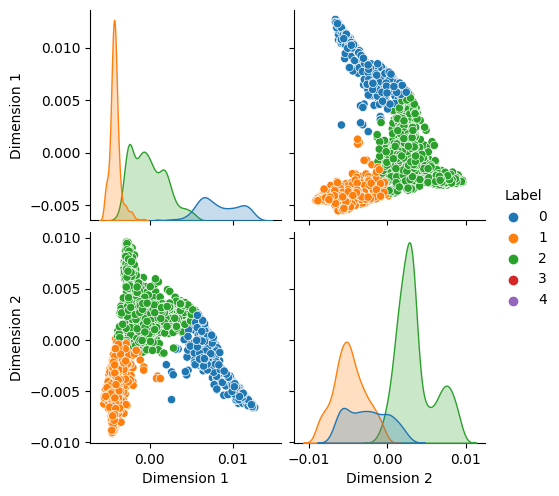

Clustering accuracy (homogeneity score):  32.82687808171726

Clustering accuracy (silhouette score):  0.24387018486626294

training time: 0.0009984970092773438 s



Classification accuracy:  18.4 




In [38]:
spectralClustering = SpectralClustering(n_clusters=5, affinity= 'rbf')
spectralClustering.fit(features_embedded)
predicted_labels = spectralClustering.labels_
embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label': predicted_labels})
sns.pairplot(embedded_labels, hue='Label',palette="tab10")
plt.show()

#More accurate implementation, considering opposite labels
accuracy = homogeneity_score(y_train, predicted_labels)
print ('Clustering accuracy (homogeneity score): ',accuracy*100)

silhouette = silhouette_score(features_embedded, predicted_labels)
print('Clustering accuracy (silhouette score): ',silhouette)
#clasify test_data 
SE=SpectralEmbedding(n_components=2, n_neighbors=20)
#transform data
features_test_embedded = SE.fit_transform(features_validation_scalar)
    
clf = NearestCentroid()
start_time=time.time()
clf.fit(features_embedded, predicted_labels)
end_time=time.time()
print(f"training time: {end_time - start_time} s\n")
predicted_labels = clf.predict(features_test_embedded)
accuracy = accuracy_score(y_test, predicted_labels)		
print ('Classification accuracy: ',accuracy*100, '\n')

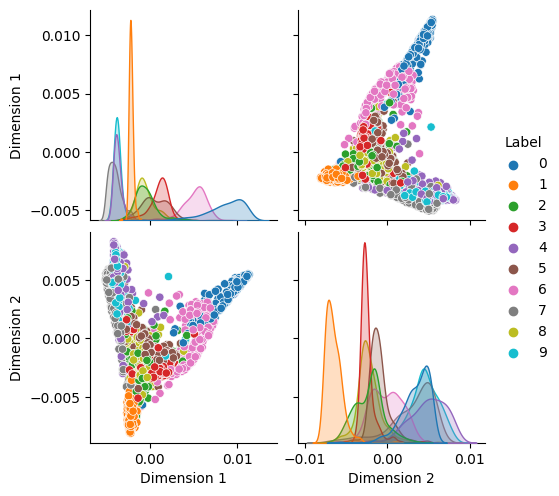

In [39]:
#spectral embedding
SE=SpectralEmbedding(n_components=2, n_neighbors=25)
features_embedded = SE.fit_transform(features_scalar)
embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label':y_train})
sns.color_palette("tab10")
sns.pairplot(embedded_labels, hue='Label', palette="tab10")
plt.show()

c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


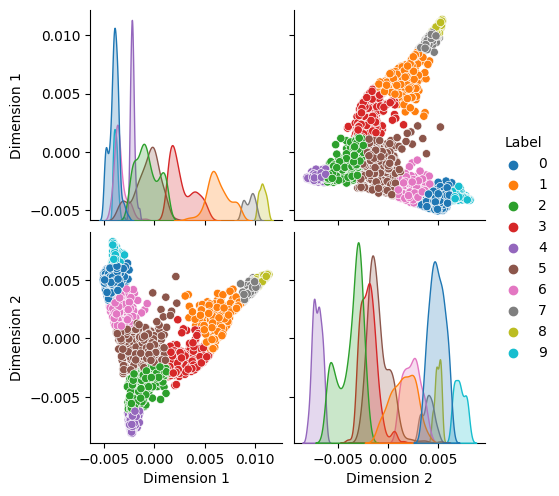

Clustering accuracy (homogeneity score):  47.381343541124174

Clustering accuracy (silhouette score):  0.37622334799398216

training time: 0.0009992122650146484 s



Classification accuracy:  13.16 




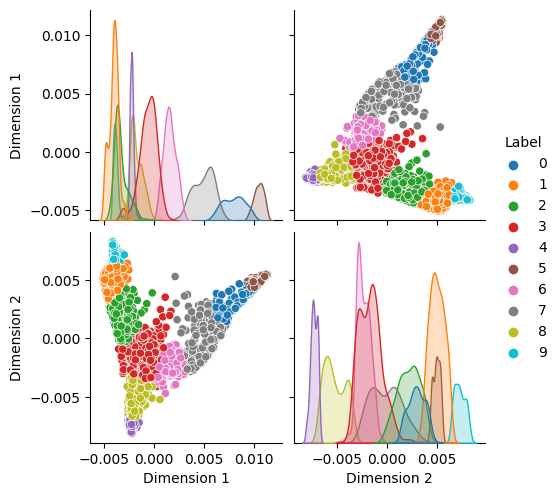

Clustering accuracy (homogeneity score):  51.647814993309524

Clustering accuracy (silhouette score):  0.39470129138753485

training time: 0.0010001659393310547 s



Classification accuracy:  12.8 




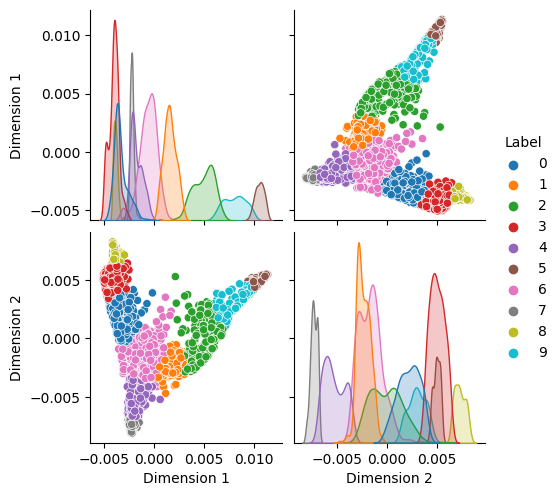

Clustering accuracy (homogeneity score):  51.678482458568155

Clustering accuracy (silhouette score):  0.3939743183029701

training time: 0.0010001659393310547 s



Classification accuracy:  7.3999999999999995 




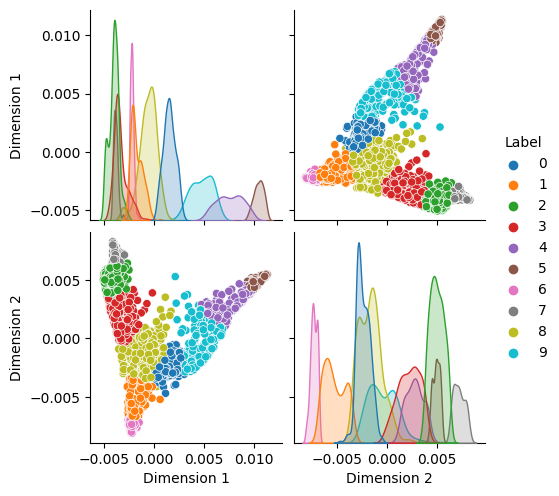

Clustering accuracy (homogeneity score):  51.13193396254738

Clustering accuracy (silhouette score):  0.39424737728280335

training time: 0.0010001659393310547 s



Classification accuracy:  12.4 




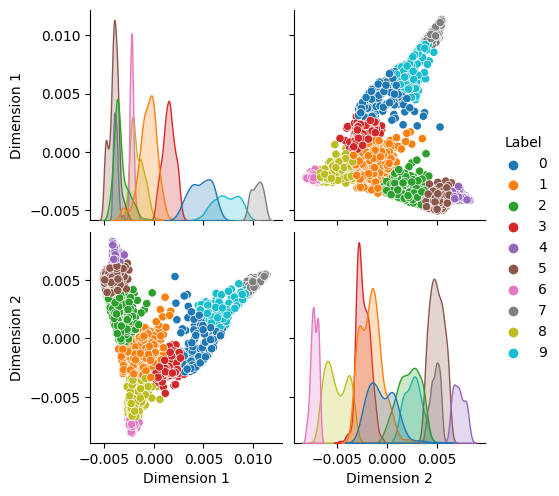

Clustering accuracy (homogeneity score):  50.939834895783655

Clustering accuracy (silhouette score):  0.40262684905469376

training time: 0.0010001659393310547 s



Classification accuracy:  14.719999999999999 




In [40]:
#Spectral Clustering

for i in range(5,30,5):
    spectralClustering = SpectralClustering(n_clusters=10, affinity= 'nearest_neighbors', n_neighbors=i)
    spectralClustering.fit(features_embedded)
    predicted_labels = spectralClustering.labels_
    embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label': predicted_labels})
    sns.pairplot(embedded_labels, hue='Label',palette="tab10")
    plt.show()

    #More accurate implementation, considering opposite labels
    accuracy = homogeneity_score(y_train, predicted_labels)
    print ('Clustering accuracy (homogeneity score): ',accuracy*100)

    silhouette = silhouette_score(features_embedded, predicted_labels)
    print('Clustering accuracy (silhouette score): ',silhouette)
   
    SE=SpectralEmbedding(n_components=2, n_neighbors=25)
    #transform data
    features_test_embedded = SE.fit_transform(features_validation_scalar)
    
    clf = NearestCentroid()
    start_time=time.time()
    clf.fit(features_embedded, predicted_labels)
    end_time=time.time()
    print(f"training time: {end_time - start_time} s\n")
    predicted_labels = clf.predict(features_test_embedded)
    accuracy = accuracy_score(y_test, predicted_labels)		
    print ('Classification accuracy: ',accuracy*100, '\n')

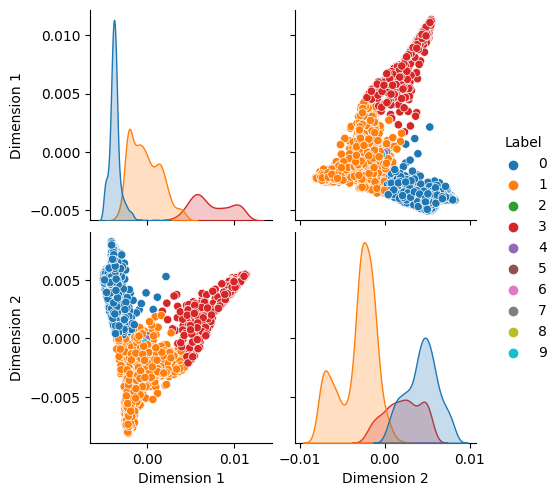

Clustering accuracy (homogeneity score):  33.64955869630866

Clustering accuracy (silhouette score):  0.20625189408765318

training time: 0.0009999275207519531 s



Classification accuracy:  3.4799999999999995 




In [41]:
spectralClustering = SpectralClustering(n_clusters=10, affinity= 'rbf')
spectralClustering.fit(features_embedded)
predicted_labels = spectralClustering.labels_
embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label': predicted_labels})
sns.pairplot(embedded_labels, hue='Label',palette="tab10")
plt.show()

#More accurate implementation, considering opposite labels
accuracy = homogeneity_score(y_train, predicted_labels)
print ('Clustering accuracy (homogeneity score): ',accuracy*100)

silhouette = silhouette_score(features_embedded, predicted_labels)
print('Clustering accuracy (silhouette score): ',silhouette)
#clasify test_data 
SE=SpectralEmbedding(n_components=2, n_neighbors=25)
#transform data
features_test_embedded = SE.fit_transform(features_validation_scalar)
    
clf = NearestCentroid()
start_time=time.time()
clf.fit(features_embedded, predicted_labels)
end_time=time.time()
print(f"training time: {end_time - start_time} s\n")
predicted_labels = clf.predict(features_test_embedded)
accuracy = accuracy_score(y_test, predicted_labels)		
print ('Classification accuracy: ',accuracy*100, '\n')